In [30]:
#data processing
import numpy as np
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [40]:
# import data
data=pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
data=data.drop("Cabin",axis=1)

In [47]:
data=data.drop("PassengerId",axis=1)

In [48]:
data=data.drop("Ticket",axis=1)

In [49]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [50]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

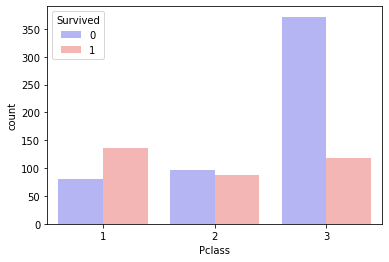

In [51]:
#visualization
sns.countplot(data = data, x = 'Pclass', hue ='Survived',palette = 'bwr')

In [52]:
data[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [53]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 15 , 15 ) )

    cmap = sns.diverging_palette( 255 , 10 , as_cmap = True )

    s =sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = {'fontsize': 12 }

 )
  

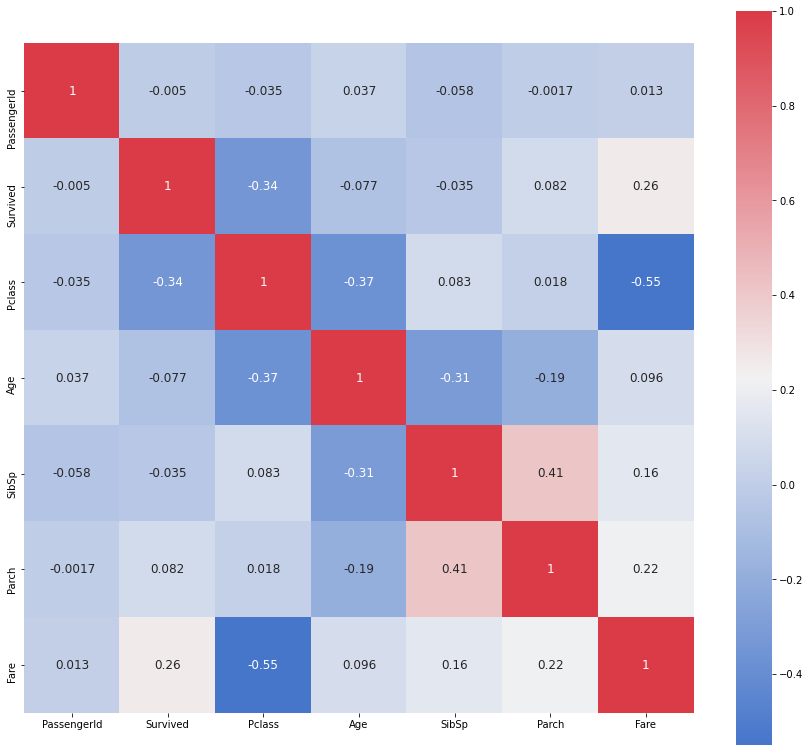

In [16]:
plot_correlation_map(data)

In [54]:
x = pd.get_dummies(data["Sex"])
data=data.drop("Sex", axis = 1) 
data=data.join(x) 
data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,1,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1


In [55]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'female', 'male'],
      dtype='object')

In [26]:
new_data=data.drop(['Survived', 'Pclass', 'Name',  'SibSp', 'Ticket','Cabin','Parch'],axis=1)

new_data.head()

,PassengerId,Age,Fare,female,male,C,Q,S
0,1,22.0,7.2500,0,1,0,0,1
1,2,38.0,71.2833,1,0,1,0,0
2,3,26.0,7.9250,1,0,0,0,1
3,4,35.0,53.1000,1,0,0,0,1
4,5,35.0,8.0500,0,1,0,0,1


In [56]:
#Importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [57]:
data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,1,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,1,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,0,1


In [58]:
#features extraction
x = data[['Pclass', 'female','male']]
y = data['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) 


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))


Accuracy=0.78


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

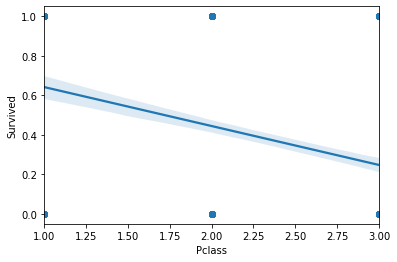

In [63]:
import seaborn as sns
sns.regplot(x='Pclass',y='Survived',data=data)


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

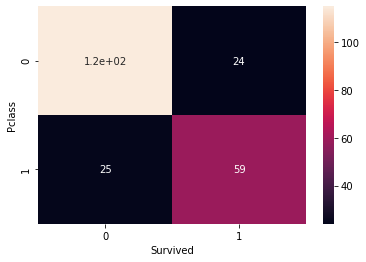

In [66]:
#Utilisation du matrice de confusion
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Pclass'], colnames=['Survived'])
sns.heatmap(confusion_matrix, annot=True)


In [67]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.82      0.83      0.82       139
           1       0.71      0.70      0.71        84

    accuracy                           0.78       223
   macro avg       0.77      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223

